# Natural Language Processing

**Natural Language Processing (NLP)** - це галузь штучного інтелекту (ШІ), яка займається взаємодією між комп'ютерами та людьми за допомогою природної мови, такої як англійська, французька, китайська тощо. Основна мета NLP - розуміння та аналіз людської мови комп'ютерними системами.

Основні аспекти NLP включають в себе:

 - Розуміння природної мови (Natural Language Understanding, NLU): Цей аспект полягає в тому, що комп'ютер може розуміти інформацію, виражену в природній мові. Це може включати розпізнавання слів, розуміння синтаксису, семантики та контексту.
 - Генерація природної мови (Natural Language Generation, NLG): NLG відповідає за створення природних мовних висловлювань комп'ютерними системами. Це може включати створення тексту, генерацію відповідей на запитання, створення описів тощо.
 - Машинне навчання та статистичні методи: Багато NLP систем базуються на методах машинного навчання, таких як нейронні мережі, що дозволяють комп'ютерам вчитися на основі великих обсягів даних для розуміння та генерації мови.
 - Застосування: NLP має широкі застосування в різних галузях, таких як обробка текстів, автоматичний переклад, аналіз настроїв у соціальних медіа, чат-боти, системи відповідей на запитання, аналіз документів тощо.

NLP відіграє значну роль у вирішенні складних завдань в обробці мовлення та створенні інтелектуальних систем, які можуть взаємодіяти з людьми зрозуміло та ефективно.

## Language understaning

"Мама мила раму, і тепер вона блистить"  --  Хто "вона"?
"Мама мила раму, і тепер вона сильно втомилася"  --  Хто "вона"?

"Книжка не поміщалася у валізу, тому що вона була надто велика"  --  Що саме було надто великим, валіза чи книга? А якщо замінити "надто велика" на "надто мала"?


## Tasks

1. Синтаксичні задачі
    * розмітка за частинами мови і за морфологічними ознаками
    * розділення слів у тексті на морфеми (суфікс, префікс та ін.)
    * стеммінг, лемматизація (?)
    * розділення на речення (проблема ініціалів та скорочень) та слова (китайська мова)
    * пошук імен та власних назв у тексті
    * визначення точного значення слова у заданому контексті - проблема омонімії (вити, мати, замок, захід)
    * побудова синтаксичного дерева
    * визначення зв'язків між словами
2. Задачі на розуміння тексту, в яких є "вчитель"
    * передбачення наступного символа (допомагає у S2T)
    * інформаційний пошук
    * аналіз тональності
    * виділення відношень / зв'язків та фактів
    * відповіді на питання
3. Розуміння та генерація тексту (оцінка якості?)
    * генерація тексту
    * машинний переклад
    * діалогові моделі (чат-бот)
  
Опосередковані задачі:
* опис зображення
* розпізнавання мовлення
  
**Задачі бізнесу:**
* розпізнавання мовлення (помічник)
* чат-бот (заміна тех-підтримки у розв'язанні більшості питань)
* пошук точної відповіді на питання в базі документів (наприклад, база стандартів)
* оцінка відгуків у соцмережах про продукти та послуги
* ... 


In [1]:
# nltk - бібліотека для обробки тексту, яка включає в себе інструменти для токенізації, стемінгу, лематизації тощо.
# ftfy - бібліотека для автоматичного виправлення проблем з кодуванням тексту.
# pymorphy2 - бібліотека для морфологічного аналізу мови.
# pymorphy2-dicts-uk - словники для морфологічного аналізу української мови засобами pymorphy2.
# spacy - бібліотека для обробки природної мови, яка має різноманітні функції, такі як токенізація, розпізнавання частин мови тощо.
# gensim - бібліотека для тематичного моделювання та обробки тексту.
# wordcloud - бібліотека для візуалізації хмар слів.

!pip install nltk ftfy pymorphy2 pymorphy2-dicts-uk spacy gensim wordcloud
!python -m spacy download uk_core_news_sm
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.9/14.9 MB 3.9 MB/s eta 0:00:00m eta 0:00:010:00:01
✔ Download and installation successful
You can now load the package via spacy.load('uk_core_news_sm')
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 5.9 MB/s eta 0:00:000:00:01m eta 0:00:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [2]:
import nltk

nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/oleh_komenchuk/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Text tokenization

У контексті обробки природної мови (NLP), токен (token) використовується для означення найменшого елементу тексту, який має сенсове значення. Токен може бути словом, числом, пунктуаційним знаком або будь-яким іншим елементом тексту, який можна розглядати як окремий символ або одиничну одиницю для подальшої обробки.

Основні аспекти токенізації та роботи з токенами в NLP:

1. **Токенізація тексту**: Це процес розділення тексту на окремі токени. Зазвичай використовуються різні правила для розділення тексту, такі як розділення за пробілами, видалення пунктуації та інші.

2. **Створення словника**: Після токенізації створюється словник, який містить усі унікальні токени з тексту. Цей словник може бути використаний для подальшої обробки та аналізу тексту.

3. **Представлення тексту**: Токени можуть бути використані для представлення тексту у вигляді числових векторів або інших форматів, які можна подавати на вхід моделям машинного навчання.

4. **Обробка текстової інформації**: Токени використовуються для виконання різних завдань в NLP, таких як класифікація текстів, машинний переклад, аналіз настроїв та багато інших.

5. **Урахування контексту**: При роботі з токенами важливо враховувати контекст тексту, оскільки значення токенів може залежати від контексту, у якому вони знаходяться.

Токени є важливим елементом в NLP, оскільки вони дозволяють представляти та обробляти текстову інформацію для подальшого аналізу та використання в моделях машинного навчання.

Найбільш простий підхід - розділити пробілами.

Проблеми:
* `my.email@gmail.com`, `127.0.0.1`
* `С++`, `C#`
* `York University` vs `New York University`
* Залежність від мови (“Lebensversicherungsgesellschaftsangestellter”, “l’amour”)

In [3]:
from nltk.tokenize import RegexpTokenizer

# Імпортуємо RegexpTokenizer з NLTK для токенізації тексту.
# RegexpTokenizer дозволяє використовувати регулярні вирази для визначення токенів.

# Створюємо об'єкт RegexpTokenizer з вказаним регулярним виразом.
# '\w+' - вибирає всі слова (послідовності літер та цифр).
# '|[^\w\s]+' - вибирає всі символи, які не є словами або пропусками.

tokenizer = RegexpTokenizer('\w+|[^\w\s]+')

# Текст, який буде токенізований.
s = "Трісія любила Нью-Йорк, оскільки любов до Нью-Йорку могла позитивно вплинути на її кар'єру."

# Виконуємо токенізацію тексту та виводимо кожен токен з роздільником "::".
for t in tokenizer.tokenize(s):
    print(t, end=" :: ")

Трісія :: любила :: Нью :: - :: Йорк :: , :: оскільки :: любов :: до :: Нью :: - :: Йорку :: могла :: позитивно :: вплинути :: на :: її :: кар :: ' :: єру :: . :: 

### Stop words

Найпоширеніші слова, які не мають значення:

In [8]:
from nltk.corpus import stopwords

# print(' '.join(stopwords.words('english')))
print(' '.join(stopwords.words('german')))

aber alle allem allen aller alles als also am an ander andere anderem anderen anderer anderes anderm andern anderr anders auch auf aus bei bin bis bist da damit dann der den des dem die das dass daß derselbe derselben denselben desselben demselben dieselbe dieselben dasselbe dazu dein deine deinem deinen deiner deines denn derer dessen dich dir du dies diese diesem diesen dieser dieses doch dort durch ein eine einem einen einer eines einig einige einigem einigen einiger einiges einmal er ihn ihm es etwas euer eure eurem euren eurer eures für gegen gewesen hab habe haben hat hatte hatten hier hin hinter ich mich mir ihr ihre ihrem ihren ihrer ihres euch im in indem ins ist jede jedem jeden jeder jedes jene jenem jenen jener jenes jetzt kann kein keine keinem keinen keiner keines können könnte machen man manche manchem manchen mancher manches mein meine meinem meinen meiner meines mit muss musste nach nicht nichts noch nun nur ob oder ohne sehr sein seine seinem seinen seiner seines selb

In [5]:
!ls $HOME/nltk_data/corpora/stopwords/

README      catalan     finnish     hinglish    nepali      slovene
arabic      chinese     french      hungarian   norwegian   spanish
azerbaijani danish      german      indonesian  portuguese  swedish
basque      dutch       greek       italian     romanian    tajik
bengali     english     hebrew      kazakh      russian     turkish


Проблеми:
* "to be or not to be"
* як вирішити проблеми за допомогою простих моделей для семантичного аналізу, коли всі "glue" (glue words are words like 'that, the, and, is, are.") слова чи символи емодзі були видалені?


### Normalization

* сформувати набір правил, за якими перетворюється токен  
Нью-Йорк $\rightarrow$ нью-йорк $\rightarrow$ ньюйорк $\rightarrow$ ньюіорк
* у явній формі зберігати зв'язок між токенами (WordNet – Princeton)  
машина $\rightarrow$ автомобіль, Windows 11 $\rightarrow$ windows

In [9]:
s = 'НЬЮ-ЙОРК'
s1 = s.lower()
print(s1)

нью-йорк


In [10]:
import re

# Видаляємо всі не буквенно-цифрові символи з рядка s1.
# Флаг re.U вказує на використання універсального коду для шаблонів та даних в рядках.
s2 = re.sub(r"\W", "", s1, flags=re.U)

# Виводимо змінений рядок після видалення не буквенно-цифрових символів.
print(s2)

ньюйорк


In [11]:
import re

# Замінюємо символ 'й' на символ 'і' в рядку s2.
# Флаг re.U вказує на використання універсального коду для шаблонів та даних в рядках.
s3 = re.sub(r"й", u"і", s2, flags=re.U)

# Виводимо змінений рядок після заміни символів.
print(s3)

ньюіорк


### Stemming

**Stemming** - це процес обробки тексту в рамках обробки природної мови (NLP), який полягає в виокремленні основи слова (stem) шляхом відкидання афіксів, таких як закінчення та суфікси. Мета stemming - зведення різних форм одного слова до загального кореня для полегшення аналізу та обробки текстів.

Основні принципи stemming:

- Видалення афіксів: Під час stemming, афікси (тобто закінчення та суфікси) слова відкидаються, залишаючи лише його основу або корінь.
- Загальна форма: Після видалення афіксів, слова приводяться до загальної форми, що дозволяє розпізнавати спільні корені та виконувати подальші дії на основі цих коренів.

Stemming допомагає зменшити розмір словника, з яким працює модель, і полегшує пошук, індексацію та аналіз текстової інформації. Однак, через простоту підходу, stemming може викликати невірні результати, так як він не завжди враховує контекст або семантику слова. Таким чином, в деяких випадках використовують більш складні та точніші методи обробки тексту, такі як лематизація.

Створення кореня передбачає видалення суфіксів (або префіксів) зі слова, щоб отримати його кореневу форму. Це не гарантує, що отримане кореневе слово є дійсним словом у мові.

### Example
Для слова ***"running"***, stem може бути ***"run"***. Для ***"flies"***, stem може бути ***"fli"***.

### Tools
Загальні алгоритми включають стемери Porter, Snowball та Lancaster. Такі бібліотеки, як NLTK і spaCy в Python, пропонують реалізацію цих алгоритмів.

### Advantages
Загалом це швидше, ніж лематизація, оскільки використовує прості евристики.

### Disadvantages
Слово з коренем може бути семантично неправильним або навіть недійсним словом. Наприклад, слово ***"university"*** може мати stem ***"univers"***, що не є справжнім словом.

In [12]:
from nltk.stem.snowball import PorterStemmer

s = PorterStemmer()

print(s.stem('Tokenization'))
print(s.stem('stemming'))
print(s.stem('university'))
print(s.stem('running'))

token
stem
univers
run


## Lemmatization

Лематизація (lemmatization) - це процес обробки текстів в рамках обробки природної мови (NLP), який полягає в приведенні слів до їхньої базової форми або леми. Лема - це нормалізована форма слова, яка представляє його базовий словниковий вигляд.

Основні аспекти лематизації:

- Приведення до базової форми: Лематизація старається привести слова до їхнього базового словникового вигляду. Наприклад, для слів "running", "ran", "runs" базовою формою буде слово "run".
- Урахування граматичних особливостей: Лематизація враховує граматичні особливості мови, такі як числа, відмінки, час та інші, для здійснення правильного перетворення слова у його базову форму.
- Контекстуальна аналітика: Лематизація також може враховувати контекст слова в реченні, щоб забезпечити більш точне визначення його базової форми.
- Використання словників та правил: Для виконання лематизації використовуються словники та набори правил, які допомагають встановити відповідність між словами та їхніми лемами.

Лематизація є більш точним і складним процесом порівняно з stemming (відбиранням основи слова), оскільки вона враховує не лише афікси, а й граматичні та семантичні особливості мови. Цей процес корисний для різних завдань NLP, таких як пошук інформації, категоризація текстів, машинний переклад, аналіз настроїв та багато іншого.

Лематизація зводить слова до їх основи або кореневої форми, враховуючи словниковий запас і морфологічний аналіз слів. Це гарантує, що корінь слова (lemma) належить мові.

### Example
Лема для ***"running"*** - це ***"run"***, а для ***"better"*** це ***"good"***.

### Tools
Такі бібліотеки, як NLTK і spaCy, надають інструменти лематизації. Лематизація зазвичай вимагає знання частини мови слова, оскільки процес сильно залежить від контексту слова.

### Advantages
Зазвичай він створює більш значущі скорочення слів, ніж коріння, і зводить слова до лінгвістично прийнятної леми.

### Disadvantages
Це обчислювально інтенсивніше, ніж стемінг.


### Spacy

#### [Ukrainian](https://spacy.io/models/uk)

```bash
python -m spacy download uk_core_news_sm
```

#### [English](https://spacy.io/models/en)

```bash
python -m spacy download en_core_web_sm
```


In [13]:
import pymorphy2

# Ініціалізуємо об'єкт MorphAnalyzer для морфологічного аналізу української мови.
morph = pymorphy2.MorphAnalyzer(lang='uk')

# Виконуємо морфологічний аналіз слова "дощить" та виводимо його словоформи та нормальні форми.
for i in morph.parse('дощить'):
    print(i.word, i.normal_form)

дощить дощити
дощить дощити


In [14]:
import pymorphy2

# Ініціалізуємо об'єкт MorphAnalyzer для морфологічного аналізу української мови.
morph = pymorphy2.MorphAnalyzer(lang='uk')

# Виконуємо морфологічний аналіз слова "замок" та виводимо його словоформи та нормальні форми.
for i in morph.parse('замок'):
    print(i.word, i.normal_form)

замок замок
замок замок
замок замок
замок замок
замок замок
замок замок
замок замокти
замок замокнути


In [15]:
import spacy
from spacy.lang.uk.examples import sentences 

# Виводимо перші 5 прикладів речень українською мовою.
print(sentences[:5])
print()

# Завантажуємо модель мови для української мови зі спеціалізованою невеликою лексикою.
nlp = spacy.load("uk_core_news_sm")

# Обробляємо третє речення з навчального набору даних.
doc = nlp(sentences[2])

# Виводимо текст речення.
print(doc.text)

# Виводимо токенизований текст речення разом з їхніми лемами.
for token in doc:
    print(token.text, token.lemma_, sep="\t\t")

['Ніч на середу буде морозною.', 'Чим кращі книги ти читав, тим гірше спиш.', 'Найстаріші ґудзики, відомі людству, археологи знайшли в долині ріки Інд.', "Слов'янське слово «Україна» вперше згадується у Київському літописному зводі за Іпатіївським списком під 1187 роком.", 'Де у Києві найсмачніша кава?']

Найстаріші ґудзики, відомі людству, археологи знайшли в долині ріки Інд.
Найстаріші		найстаріший
ґудзики		ґудзик
,		,
відомі		відомий
людству		людство
,		,
археологи		археолог
знайшли		знайти
в		в
долині		долина
ріки		ріка
Інд		інд
.		.


In [16]:
import spacy
from spacy.lang.en.examples import sentences 

# Завантажуємо модель мови для англійської мови зі спеціалізованою невеликою лексикою.
nlp = spacy.load("en_core_web_sm")

# Обробляємо перше речення з навчального набору даних.
doc = nlp(sentences[0])

# Виводимо текст речення.
print(doc.text)

# Виводимо токенизований текст речення разом з їхніми лемами.
for token in doc:
    print(token.text, token.lemma_, sep="\t\t")

Apple is looking at buying U.K. startup for $1 billion
Apple		Apple
is		be
looking		look
at		at
buying		buy
U.K.		U.K.
startup		startup
for		for
$		$
1		1
billion		billion


### Which one to choose?

* Вибір між stemming і lemmatization залежить від програми.
* Якщо швидкість викликає занепокоєння, і ви працюєте з мовою, яка має багато похідних слів, stemming може бути більш доречним.
* Якщо вам потрібна висока точність і важливо, щоб вихідні слова були в словнику, кращим вибором буде лемматизація.
* Для деяких завдань, як-от аналізу настроїв, може бути достатньо простого визначення кореня. Для завдань, що вимагають більш глибокого розуміння мови, наприклад машинного перекладу, лемматизація буде більш доречною.

У багатьох сучасних завданнях і моделях NLP, особливо тих, що базуються на глибокому навчанні, можна повністю пропустити і стеммінг, і лемматизацію, оскільки моделі здатні обробляти різні словоформи без цього етапу попередньої обробки. Однак у традиційних моделях і багатьох програмах з обмеженими даними вони залишаються важливими етапами попередньої обробки.

**From personal experience**  
- для складних мов lemmatization працює чудово
- для легких мов stemming чудово працює

## Text representation

### Boolean Model

<center>
<img src="assets/boolean_model.png">
</center>

### Bag of Words

<center>
<img src="assets/bag_of_words.webp">
</center>

<center>
<img src="assets/bag_of_words2.jpeg">
</center>

Bag of Words (BoW) - це простий та ефективний метод для представлення текстової інформації в машинному навчанні та обробці природної мови (NLP). У цьому методі текст розглядається як "мішок слів", де порядок слів не має значення, а важлива лише частота зустрічання слів у тексті.

Основні принципи Bag of Words:

1. **Токенізація**: Спочатку текст розбивається на окремі слова або токени. Цей процес може включати видалення пунктуації, розділення за пробілами та інші кроки для отримання окремих слів.

2. **Побудова словника**: Після токенізації будується словник, який містить всі унікальні слова, що були в текстах. Кожне слово у словнику отримує унікальний ідентифікатор.

3. **Створення векторів**: Для кожного тексту створюється вектор, який містить частоту зустрічання кожного слова зі словника. Довжина вектора відповідає загальній кількості унікальних слів у словнику.

4. **Незалежність від порядку слів**: У Bag of Words не враховується порядок слів у тексті, тобто інформація про послідовність слів втрачається.

Застосування Bag of Words:

1. **Моделювання текстів**: BoW використовується для побудови моделей машинного навчання, таких як класифікатори або кластеризація текстів.

2. **Аналіз настроїв**: BoW може бути застосований для аналізу настроїв у текстах, визначення ключових слів та тематичного аналізу.

3. **Інформаційний пошук**: Використовується для визначення релевантності текстів у системах інформаційного пошуку.

Хоча Bag of Words є простим методом, він має обмеження, зокрема, втрачає контекстуальну інформацію та не враховує семантику слів. Також, він може бути недоцільним у разі великого обсягу текстів через велику кількість унікальних слів у словнику.

In [17]:
# http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.DictVectorizer.html
from sklearn.feature_extraction import DictVectorizer

v = DictVectorizer(sparse=False)

# dictionary with the number of words
D = [{'foo': 1, 'bar': 2}, {'foo': 3, 'baz': 8}]

v.fit(D)

X = v.transform(D)
X  # bar, baz, foo

array([[2., 0., 1.],
       [0., 8., 3.]])

In [18]:
v.inverse_transform(X)

[{'bar': 2.0, 'foo': 1.0}, {'baz': 8.0, 'foo': 3.0}]

In [19]:
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer

# Визначаємо тексти документів.
docs = [
    "Thank 40 you, Mr President.",
    "Madam President, I agree and recognise Turkey's European prospects, but if these prospects are to have an auspicious outcome, Turkey needs to:",
    "Madam President, firstly, I would like to express my sincerest thanks to the High Representative for including this important issue in the agenda at such an early stage.",
]

# Ініціалізуємо токенізатор для розбиття тексту на токени.
tokenizer = RegexpTokenizer('\w+|[^\w\s]+')

# Завантажуємо список стоп-слів для англійської мови.
stopwords_eng = stopwords.words()

# Створюємо список для зберігання мішків слів кожного документу.
document_bags = list()

# Проходимося по кожному документу для створення мішків слів.
for d in docs:
    bag = Counter()
    text = d.lower()

    # Токенізуємо текст та створюємо мішок слів, виключаючи стоп-слова.
    for t in tokenizer.tokenize(text):     
        if t in stopwords_eng:
            continue
            
        bag[t] += 1
    document_bags.append(bag)
    
document_bags

[Counter({'40': 1, ',': 1, 'mr': 1, 'president': 1, '.': 1}),
 Counter({'madam': 1,
          'president': 1,
          ',': 3,
          'agree': 1,
          'recognise': 1,
          'turkey': 2,
          "'": 1,
          'european': 1,
          'prospects': 2,
          'auspicious': 1,
          'outcome': 1,
          ':': 1}),
 Counter({'madam': 1,
          'president': 1,
          ',': 2,
          'firstly': 1,
          'express': 1,
          'sincerest': 1,
          'high': 1,
          'representative': 1,
          'including': 1,
          'important': 1,
          'issue': 1,
          'agenda': 1,
          'early': 1,
          'stage': 1,
          '.': 1})]

In [20]:
from sklearn.feature_extraction import DictVectorizer

# Ініціалізуємо DictVectorizer.
v = DictVectorizer(sparse=False)

# Перетворюємо мішки слів у матрицю ознак X.
X = v.fit_transform(document_bags)

# Виводимо розмірність матриці ознак X.
print(X.shape)

(3, 26)


In [21]:
X

array([[0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 1., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 3., 0., 0., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0.,
        1., 0., 1., 1., 2., 1., 0., 0., 0., 2.],
       [0., 2., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1.,
        1., 0., 0., 1., 0., 0., 1., 1., 1., 0.]])

In [22]:
v.feature_names_

["'",
 ',',
 '.',
 '40',
 ':',
 'agenda',
 'agree',
 'auspicious',
 'early',
 'european',
 'express',
 'firstly',
 'high',
 'important',
 'including',
 'issue',
 'madam',
 'mr',
 'outcome',
 'president',
 'prospects',
 'recognise',
 'representative',
 'sincerest',
 'stage',
 'turkey']

`sklearn` реалізував `CountVectorizer`, але без фільтра стоп-слів, а також ігнорує пунктуацію🤯

Альтернативні токенайзери:
- spacy (ukrainian support): https://spacy.io/api/tokenizer
- huggingface: https://huggingface.co/docs/transformers/tokenizer_summary
- nltk: https://www.nltk.org/howto/tokenize.html
- gensim: https://tedboy.github.io/nlps/generated/generated/gensim.utils.tokenize.html

In [23]:
from sklearn.feature_extraction.text import CountVectorizer

# Ініціалізуємо CountVectorizer.
vectorizer = CountVectorizer()

# Виконуємо побудову словника та перетворення документів у матрицю лічильників.
# todense() використовується для отримання матриці у форматі dense.
vectorized_docs = vectorizer.fit_transform(docs).todense()

# Виводимо отриману матрицю лічильників.
print(vectorized_docs)

[[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0
  0 0 0 0 0 0 1]
 [0 0 1 1 1 1 0 1 1 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 1 1 2 1 0 0 0 0 0 0
  0 1 0 2 2 0 0]
 [0 1 0 1 0 0 1 0 0 1 0 1 1 1 0 1 0 1 1 1 1 1 1 0 1 0 0 1 0 0 1 1 1 1 0 1
  2 0 1 2 0 1 0]]


In [24]:
vectorizer.vocabulary_

{'thank': 34,
 '40': 0,
 'you': 42,
 'mr': 23,
 'president': 27,
 'madam': 22,
 'agree': 2,
 'and': 4,
 'recognise': 29,
 'turkey': 40,
 'european': 10,
 'prospects': 28,
 'but': 8,
 'if': 16,
 'these': 37,
 'are': 5,
 'to': 39,
 'have': 14,
 'an': 3,
 'auspicious': 7,
 'outcome': 26,
 'needs': 25,
 'firstly': 12,
 'would': 41,
 'like': 21,
 'express': 11,
 'my': 24,
 'sincerest': 31,
 'thanks': 35,
 'the': 36,
 'high': 15,
 'representative': 30,
 'for': 13,
 'including': 19,
 'this': 38,
 'important': 17,
 'issue': 20,
 'in': 18,
 'agenda': 1,
 'at': 6,
 'such': 33,
 'early': 9,
 'stage': 32}

Ось що це означає:

`vectorizer.vocabulary_`: це атрибут об’єкта векторизатора, який містить словник, отриманий із вхідних даних. По суті, він зіставляє кожне унікальне слово в корпусі з індексом.

Ключі словника - це слова, знайдені в корпусі, а значення - відповідні індекси, присвоєні цим словам.

Наприклад:

- 'thank': 34 означає, що слово 'thank' у корпусі зіставляється з індексом 34.
- '40': 0 означає, що слово '40' у корпусі зіставляється з індексом 0.
- 'you': 42 означає, що слово 'you' у корпусі зіставляється з індексом 42.

## TF-IDF

**TF-IDF** розшифровується як **Term Frequency-Inverse Document Frequency**. Це статистичний показник, який використовується для оцінки важливості слова в документі відносно колекції документів, яку часто називають корпусом. TF-IDF широко використовується в обробці природної мови (NLP) і інформаційному пошуку (Information Retrieval - IR) для представлення документів як векторів для таких завдань, як схожість документів, кластеризація та класифікація.

1. **Term Frequency (TF)**: він вимірює частоту слова в документі. Він розраховується як:

$$\operatorname{TF}(t, d) = \frac{\textit{Number of times term t appears in document d}}{\textit{Total number of terms in document d}}$$

2. **Inverse Document Frequency (IDF)**: Це вимірює важливість слова в усьому корпусі. Слова, які зустрічаються в багатьох документах, вважаються менш важливими, тоді як слова, які зустрічаються в меншій кількості документів, вважаються більш значущими. Він розраховується як:

$$\operatorname{IDF}(t, D) = \log \begin{pmatrix} \frac{\textit{Total number of documents in corpus D}}{\textit{Number of documents containing term t}} \end{pmatrix}$$

Тепер оцінка **TF-IDF** є просто добутком цих двох показників:

$$ \operatorname{TF-IDF(t, d, D)} = \operatorname{TF}(t, d) \times \operatorname{IDF}(t, D) $$

### Benefits

1. **Down-weights common words:** Такі слова, як «and», «the» тощо, які часто зустрічаються в більшості документів, але не є інформативними, отримують низьку вагу, оскільки їх IDF буде низьким (або навіть нульовим, якщо термін з’являється в усіх документах).

2. **Highlights important words unique to a document:** Якщо слово часто зустрічається в певному документі, але не в багатьох інших документах у корпусі, воно отримає високу оцінку TF-IDF. Це допомагає визначити унікальні теми чи поняття, пов’язані з документом.

### Applications

1. **Document Classification and Clustering:** Документи можна представити за допомогою векторів TF-IDF, і ці вектори можна використовувати для категоризації або групування документів.
2. **Information Retrieval:** Пошукові системи часто використовують TF-IDF для ранжування документів на основі релевантності запиту.
3. **Feature Extraction:** У багатьох завданнях NLP необроблений текст перетворюється на набір функцій за допомогою TF-IDF перед подачею в модель машинного навчання.

### Example

**Sentence A:** Jupyter is the largest planet. (5 words) <br>
**Sentence B:** Mars is the fourth planet from the sun. (8 words)

<center>
<img src="assets/tfidf.webp">
</center>

In [25]:
# Імпортуємо TfidfVectorizer з бібліотеки Scikit-learn, який використовується для перетворення тексту в числові вектори TF-IDF.
from sklearn.feature_extraction.text import TfidfVectorizer

# Створюємо об'єкт TfidfVectorizer без параметрів. Можна також вказати параметр `stop_words` для виключення стоп-слів з обробки.
vectorizer = TfidfVectorizer()

# Застосовуємо метод fit_transform до текстових даних `docs`, щоб отримати матрицю ознак. 
# Метод fit_transform навчає модель на текстових даних і одночасно застосовує трансформацію до них.
# Метод todense() перетворює матрицю, отриману після fit_transform, у dense матрицю.
features = vectorizer.fit_transform(docs).todense()

# Повертаємо матрицю ознак, яка містить числові вектори TF-IDF для кожного документа з набору `docs`.
features

matrix([[0.47952794, 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.47952794, 0.        ,
         0.        , 0.        , 0.28321692, 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.47952794,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.47952794],
        [0.        , 0.        , 0.20489728, 0.15582966, 0.20489728,
         0.20489728, 0.        , 0.20489728, 0.20489728, 0.        ,
         0.20489728, 0.        , 0.        , 0.        , 0.20489728,
         0.        , 0.20489728, 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.15582966, 0.        , 0.        ,
         0.20489728, 0.20489728, 0.12101563, 0.40979456, 

In [26]:
docs

['Thank 40 you, Mr President.',
 "Madam President, I agree and recognise Turkey's European prospects, but if these prospects are to have an auspicious outcome, Turkey needs to:",
 'Madam President, firstly, I would like to express my sincerest thanks to the High Representative for including this important issue in the agenda at such an early stage.']

In [23]:
vectorizer.vocabulary_

{'thank': 34,
 '40': 0,
 'you': 42,
 'mr': 23,
 'president': 27,
 'madam': 22,
 'agree': 2,
 'and': 4,
 'recognise': 29,
 'turkey': 40,
 'european': 10,
 'prospects': 28,
 'but': 8,
 'if': 16,
 'these': 37,
 'are': 5,
 'to': 39,
 'have': 14,
 'an': 3,
 'auspicious': 7,
 'outcome': 26,
 'needs': 25,
 'firstly': 12,
 'would': 41,
 'like': 21,
 'express': 11,
 'my': 24,
 'sincerest': 31,
 'thanks': 35,
 'the': 36,
 'high': 15,
 'representative': 30,
 'for': 13,
 'including': 19,
 'this': 38,
 'important': 17,
 'issue': 20,
 'in': 18,
 'agenda': 1,
 'at': 6,
 'such': 33,
 'early': 9,
 'stage': 32}

In [24]:
vectorizer.stop_words_

set()

In [25]:
docs

['Thank 40 you, Mr President.',
 "Madam President, I agree and recognise Turkey's European prospects, but if these prospects are to have an auspicious outcome, Turkey needs to:",
 'Madam President, firstly, I would like to express my sincerest thanks to the High Representative for including this important issue in the agenda at such an early stage.']

In [26]:
# gensim: це бібліотека для моделювання та обробки природної мови,
# яка містить інструменти для побудови моделей, векторних представлень слів та ін.

%pip install --upgrade gensim

Note: you may need to restart the kernel to use updated packages.


In [27]:
import numpy as np

# Імпортуємо бібліотеку Gensim для роботи.
import gensim
from gensim.models import TfidfModel

# Імпортуємо CountVectorizer для підрахунку токенів.
vectorizer = CountVectorizer()

# Застосовуємо метод fit_transform до текстових даних `docs`, щоб отримати матрицю ознак.
x = vectorizer.fit_transform(docs).todense()

# Конвертуємо матрицю, щоб отримати корпус документів у форматі Gensim.
corpus = [list(filter(lambda x: x[1] != 0, enumerate(np.asarray(row)[0]))) for row in x]

# Створюємо модель TF-IDF на основі корпусу документів.
tfidf = TfidfModel(corpus)

# Виводимо TF-IDF вектор першого документу у корпусі.
print(tfidf[corpus[0]])

[(0, 0.5), (23, 0.5), (34, 0.5), (42, 0.5)]


## Bayes classification

### Bayes Theorem

Основою Naive Bayes classifier є теорема Байєса, яка пов’язує умовні й граничні ймовірності подій:

$$ p(A|B) = \frac{p(B|A) \times p(A)}{p(B)} $$

де:
- $p(A|B)$ is the posterior probability (after seeing evidence B).
- $p(B|A)$ is a likelihood.
- $p(A)$ is the prior probability of A.
- $p(B)$ is the evidence

[Theoreme explanation.](https://www.mathsisfun.com/data/bayes-theorem.html)

### Naive Bayes

Алгоритм **Naive Bayes** – це імовірнісна модель машинного навчання, яка використовується для класифікаційних завдань. Він заснований на теоремі Байєса з припущенням про незалежність предикторів (отже, «наївних»). Незважаючи на його простоту та наївне припущення, він може бути особливо ефективним, особливо для завдань класифікації тексту, таких як виявлення спаму.

#### 1. Making the "Naive" Assumption

«Наївність» у «Naive Bayes» виникає з припущення, що кожна риса є незалежною від інших. Для проблеми класифікації з декількома ознаками це означає:

$$ p(F_1, F_2, ..., F_n | C) = p(F_1|C) \times p(F_2|C) \times ... \times p(F_n|C) $$

Де $F_1, ..., F_n$ — це функції, а $C$ — це клас.

#### 2. Training

Щоб навчити наївний класифікатор Байєса:
* Обчислити попередні ймовірності для кожного класу.
* Для кожного класу обчисліть ймовірність кожної ознаки (ймовірність ознаки даного класу).

#### 3. Prediction

Щоб передбачити клас нової точки даних:
* Для кожного класу обчисліть добуток імовірності кожної функції (припускаючи, що вони незалежні) і пріоритет цього класу. Це дає чисельник теореми Байєса для кожного класу.
* Доказ (знаменник теореми Байєса) залишається постійним під час порівняння різних класів, тому ви можете пропустити його обчислення, якщо вас цікавить лише те, який клас є найбільш імовірним.
* Клас із найвищим продуктом (product) із наведеного вище розрахунку є прогнозом для точки даних.

#### Example

Припустимо, що ви створюєте детектор спаму. У вас є два класи: **"spam"** і **"not spam"**. Для кожного слова у вашому словниковому запасі:
* Ви обчислите ймовірність появи цього слова в спам-повідомленнях.
* Ви обчислите ймовірність появи цього слова в повідомленнях, які не є спамом.

Для нового електронного листа ви візьмете кожне слово та використаєте ці ймовірності, щоб обчислити ймовірність того, що цей електронний лист є спамом чи ні, на основі слів, які він містить, і класифікувати його як клас із вищою ймовірністю.

#### Types of Naive Bayes Classifiers

* **Gaussian:** Припускає, що функції дотримуються нормального розподілу. Зазвичай використовується для безперервних даних.
* **Multinomial:** Підходить для дискретних даних. Наприклад, класифікація тексту за допомогою моделі «Bag of Words».
* **Bernoulli:** Використовується для двійкових/логічних функцій.

#### Advantages

* Просто і швидко.
* Добре працює з масивами даних великого розміру.
* Незважаючи на те, що припущення про незалежність рідко справджується, на практиці Naive Bayes часто працює напрочуд добре.

#### Disadvantages

* Його наївне припущення може бути обмеженням у певних випадках.
* Він не може вивчати взаємодію між функціями.


Незважаючи на свою простоту, Naive Bayes може перевершити більш складні методи класифікації в конкретних ситуаціях, особливо в текстових завданнях.


[More info about Naive Bayes you can read from sklearn.](https://scikit-learn.org/stable/modules/naive_bayes.html)

## Spam classification example

Dataset - [spam/ham](https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset)

In [28]:
import pandas as pd
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split, RandomizedSearchCV

In [29]:
df = pd.read_csv("spam.csv", skiprows=1, usecols=[0, 1], encoding="ISO-8859-1", names=["target", "text"])
print(df.shape)
df.head(30)

(5572, 2)


,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   target  5572 non-null   object
 1   text    5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [31]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/oleh_komenchuk/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [32]:
import nltk

# Імпортуємо список стоп-слів для англійської мови з NLTK.
stopwords_eng = stopwords.words()

# Створюємо порожні списки для токенів спаму, токенів не спаму та усіх токенів.
spam_tokens = []
ham_tokens = []
all_tokens = []

# Ітеруємося по кожному рядку в датафреймі `df`.
for index, row in df.iterrows():
    # Отримуємо мітку класу (спам або не спам) та текст рядка.
    cls, text = row["target"], row["text"]
    # Перетворюємо текст у нижній регістр.
    text = text.lower()

    # Токенізуємо текст за допомогою NLTK.
    for t in nltk.word_tokenize(text):     
        # Якщо токен є стоп-словом, пропускаємо його.
        if t in stopwords_eng:
            continue
        # Додаємо токен до відповідного списку в залежності від класу.
        if cls == 'spam':
            spam_tokens.append(t)
        if cls == 'ham':
            ham_tokens.append(t)
        # Додаємо токен до загального списку токенів.
        all_tokens.append(t)

In [38]:
spam_tokens[:20]

['free',
 'entry',
 '2',
 'wkly',
 'comp',
 'win',
 'cup',
 'final',
 'tkts',
 '21st',
 '2005.',
 'text',
 '87121',
 'receive',
 'entry',
 'question',
 '(',
 'std',
 'txt',
 'rate']

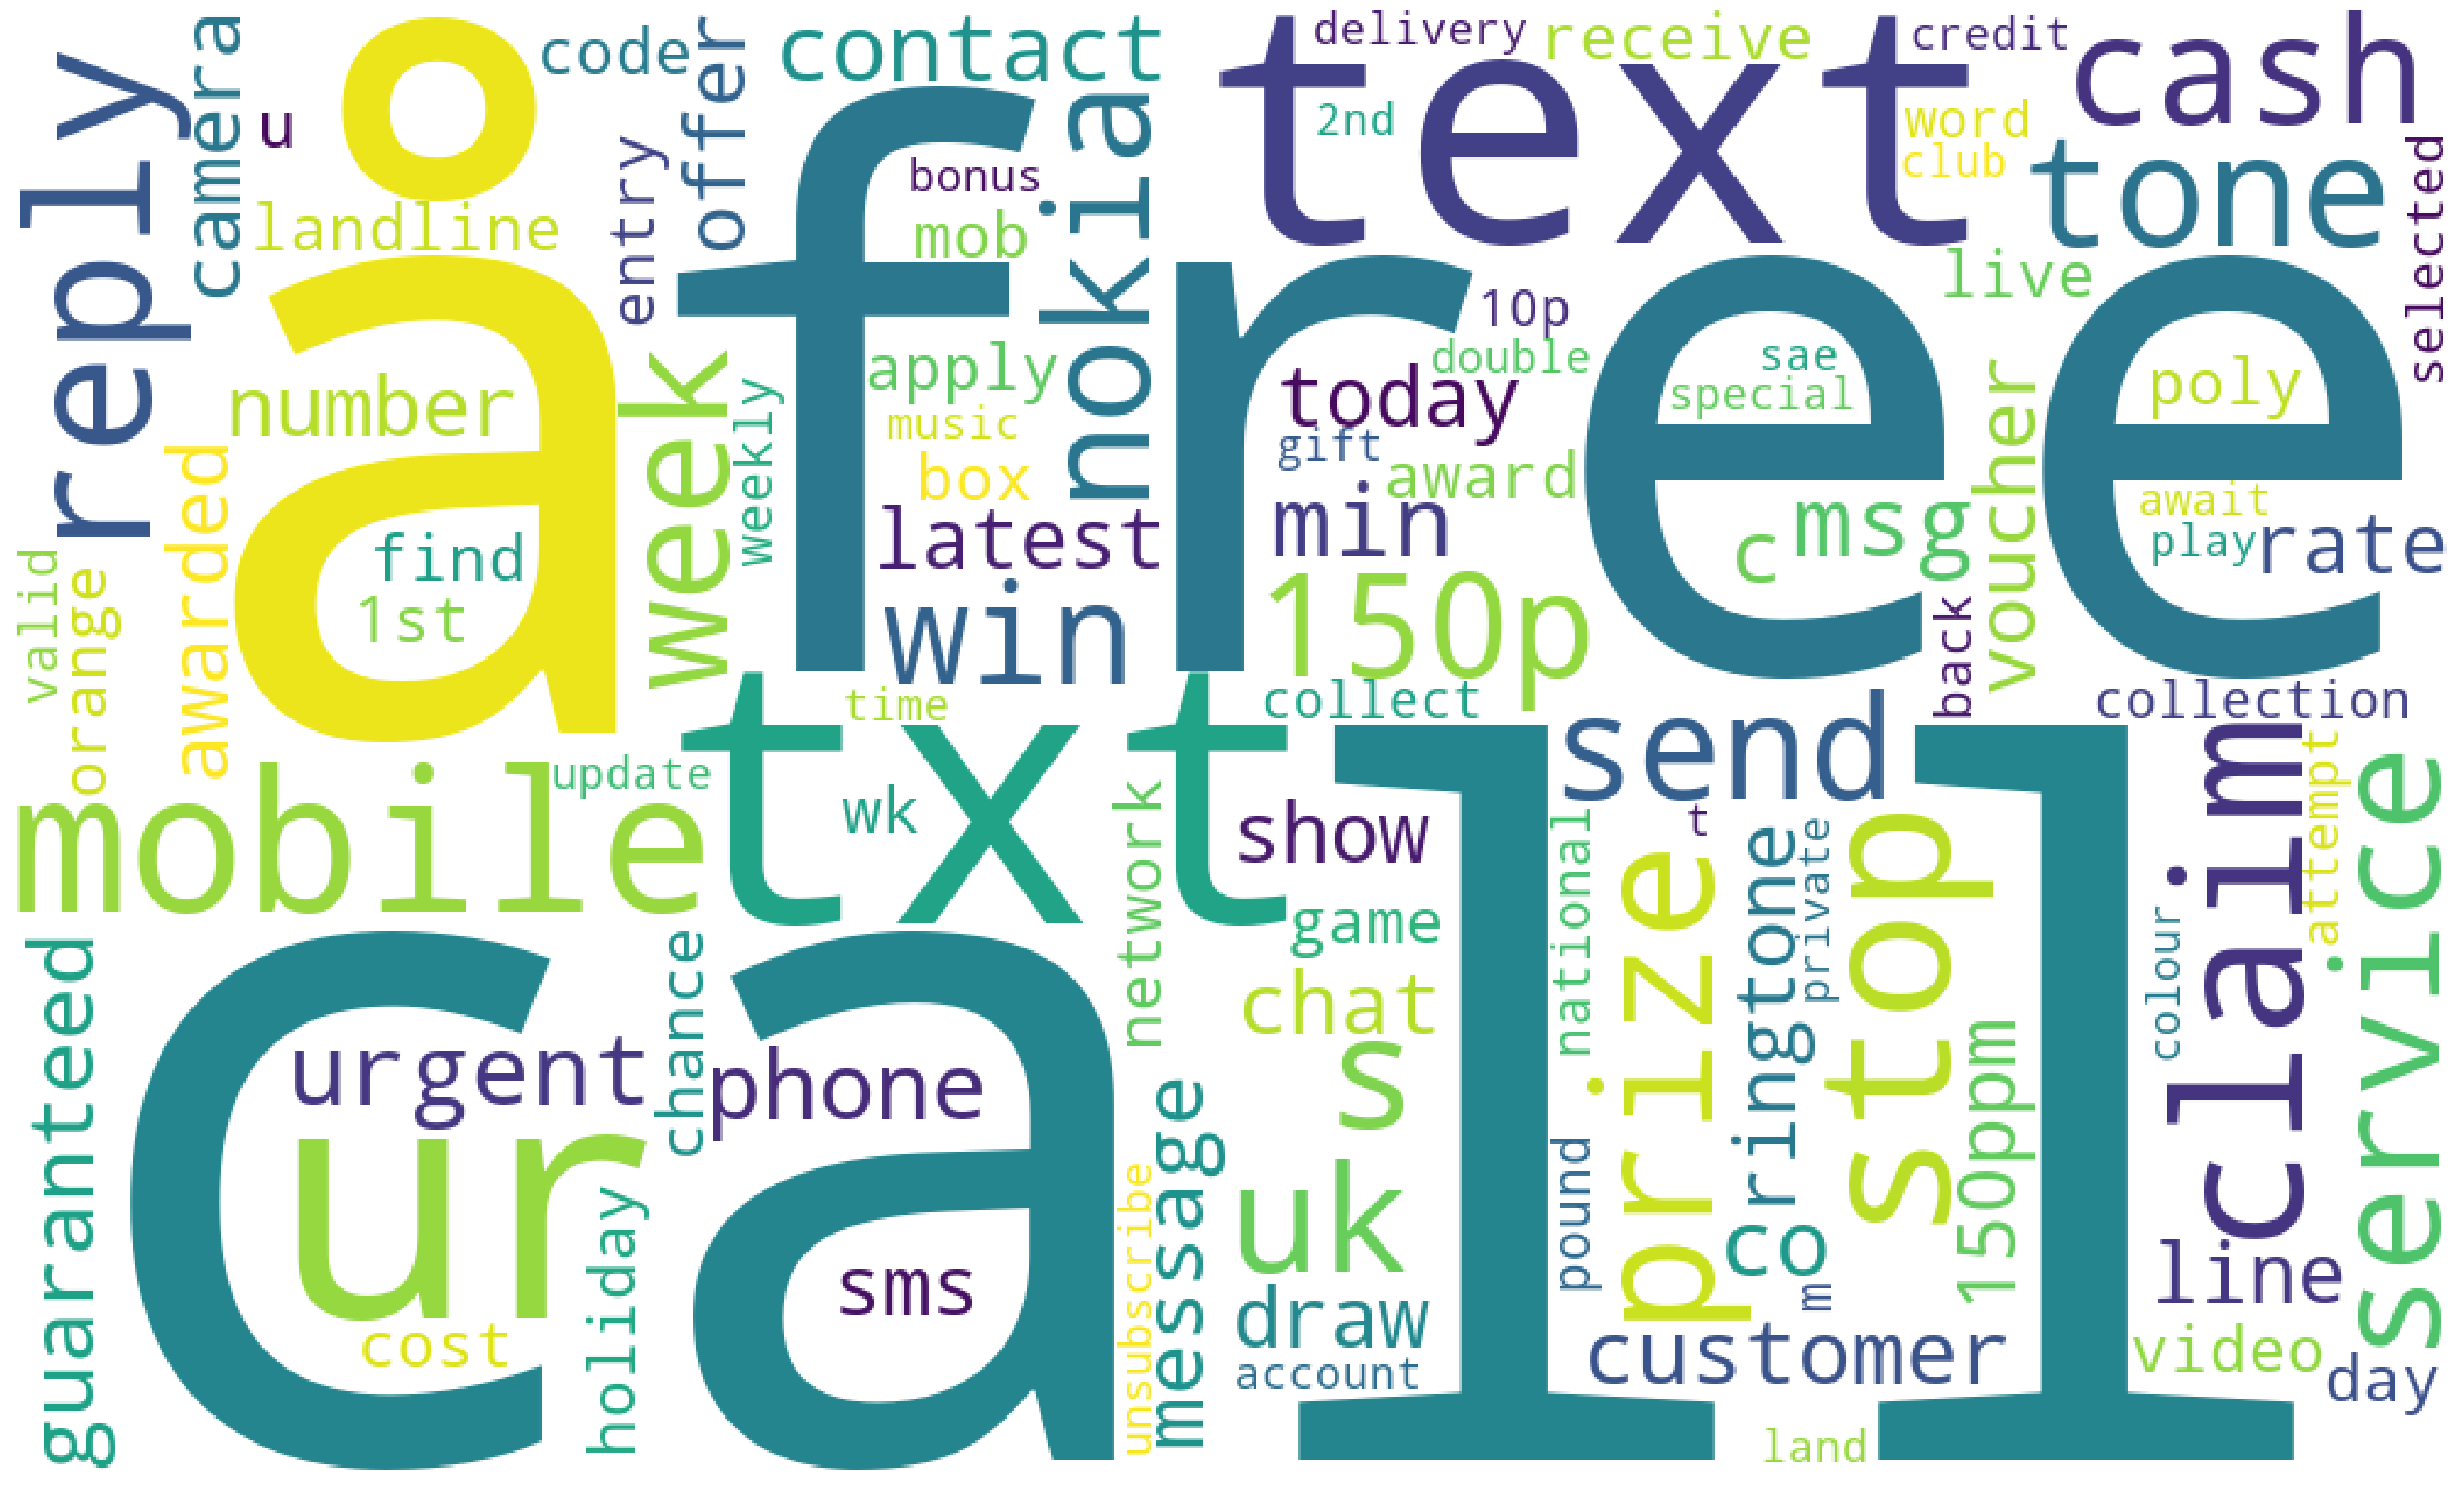

In [40]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Об'єднуємо всі токени у рядок.
tokens = ' '.join(spam_tokens)

# Створюємо об'єкт WordCloud із вказаними параметрами.
wordcloud = WordCloud(
    width=1000, height=600, max_words=100,
    random_state=42, background_color="white", colormap="viridis_r",
    collocations=False, stopwords=STOPWORDS
).generate(tokens)

# Налаштовуємо параметри візуалізації.
plt.figure(figsize=(40, 30))
plt.imshow(wordcloud)
plt.axis("off");

In [41]:
# Вибираємо лише ті слова, які складаються з літер за допомогою методу isalpha().
tokens_cleaned = [word for word in all_tokens if word[0].isalpha()]

# Знаходимо частоту кожного слова за допомогою nltk.FreqDist().
tokens_freq = nltk.FreqDist(tokens_cleaned)

# Виводимо 20 найпопулярніших слів разом з їхніми частотами.
tokens_freq.tabulate(20)

  call     ur    n't     gt     lt   free   time    day   love   send   text    txt   home      r  sorry   back  today   stop  reply mobile 
   576    381    362    318    316    278    216    203    201    191    189    169    163    161    159    153    152    151    146    138 


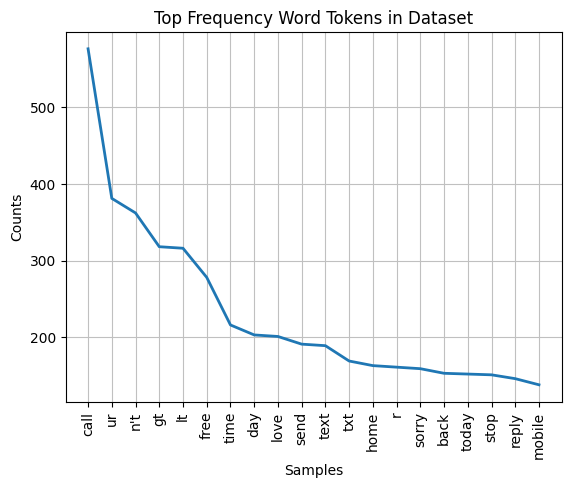

In [42]:
tokens_freq.plot(20, title="Top Frequency Word Tokens in Dataset");

In [43]:
vectorizer = CountVectorizer()
# vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df["text"])

y = pd.get_dummies(df["target"], dtype="int")["spam"]

In [44]:
len(vectorizer.vocabulary_)

8672

In [45]:
vectorizer.vocabulary_

{'go': 3550,
 'until': 8030,
 'jurong': 4350,
 'point': 5920,
 'crazy': 2327,
 'available': 1303,
 'only': 5537,
 'in': 4087,
 'bugis': 1751,
 'great': 3634,
 'world': 8489,
 'la': 4476,
 'buffet': 1749,
 'cine': 2048,
 'there': 7645,
 'got': 3594,
 'amore': 1069,
 'wat': 8267,
 'ok': 5504,
 'lar': 4512,
 'joking': 4318,
 'wif': 8392,
 'oni': 5533,
 'free': 3358,
 'entry': 2949,
 'wkly': 8447,
 'comp': 2165,
 'to': 7756,
 'win': 8405,
 'fa': 3087,
 'cup': 2386,
 'final': 3207,
 'tkts': 7743,
 '21st': 411,
 'may': 4930,
 '2005': 402,
 'text': 7595,
 '87121': 784,
 'receive': 6297,
 'question': 6190,
 'std': 7230,
 'txt': 7933,
 'rate': 6242,
 'apply': 1156,
 '08452810075over18': 77,
 'dun': 2802,
 'say': 6633,
 'so': 7024,
 'early': 2823,
 'hor': 3927,
 'already': 1042,
 'then': 7640,
 'nah': 5238,
 'don': 2712,
 'think': 7660,
 'he': 3781,
 'goes': 3558,
 'usf': 8075,
 'lives': 4665,
 'around': 1207,
 'here': 3831,
 'though': 7680,
 'freemsg': 3365,
 'hey': 3841,
 'darling': 2443,
 'it

In [46]:
X.todense()[:10]

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])

In [47]:
y[:10]

0    0
1    0
2    1
3    0
4    0
5    1
6    0
7    0
8    1
9    1
Name: spam, dtype: int64

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)

In [49]:
X.shape

(5572, 8672)

In [50]:
def randomized_cv(model, param_grid, x_train, y_train):
    # Створюємо об'єкт RandomizedSearchCV з вказаними параметрами.
    grid_search = RandomizedSearchCV(model, param_grid, cv=5, scoring='accuracy', n_iter=10)
    # Проводимо пошук оптимальних гіперпараметрів на основі зазначених даних.
    grid_search.fit(x_train, y_train)
    # Виводимо найкращий результат та модель.
    print('model {} best accuracy score is {}'.format(model.__class__.__name__, grid_search.best_score_))
    return grid_search.best_estimator_

In [51]:
# Визначаємо сітку параметрів, яка включає значення параметру alpha для нашої моделі Multinomial Naive Bayes.
param_grid = {'alpha':[0.001, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 1.5, 2, 5]}

# Створюємо модель Multinomial Naive Bayes.
model = MultinomialNB()

# Застосовуємо функцію randomized_cv для випадкового пошуку найкращих параметрів моделі.
best_model = randomized_cv(model, param_grid, X_train, y_train)

model MultinomialNB best accuracy score is 0.9801791616869624


In [52]:
y_pred = best_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1592
           1       0.92      0.94      0.93       247

    accuracy                           0.98      1839
   macro avg       0.95      0.97      0.96      1839
weighted avg       0.98      0.98      0.98      1839



In [54]:
# vectorizer.inverse_transform(X_test[:10])

In [55]:
from sklearn.linear_model import LogisticRegression

# Визначаємо сітку параметрів для логістичної регресії.
param_grid = {
    "penalty": ["l2"],
    "C": [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
    "fit_intercept": [True, False],
}

# Ініціалізуємо модель логістичної регресії.
model_lr = LogisticRegression()

# Застосовуємо функцію randomized_cv для випадкового пошуку найкращих параметрів моделі логістичної регресії.
best_model_lr = randomized_cv(model_lr, param_grid, X_train, y_train)

# Прогнозуємо класи для тестового набору даних.
y_pred = best_model_lr.predict(X_test)

# Виводимо звіт про класифікацію для тестового набору даних.
print(classification_report(y_test, y_pred))

model LogisticRegression best accuracy score is 0.9804440281232167
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1592
           1       0.99      0.87      0.92       247

    accuracy                           0.98      1839
   macro avg       0.98      0.93      0.96      1839
weighted avg       0.98      0.98      0.98      1839



In [56]:
from sklearn.ensemble import RandomForestClassifier

# Визначаємо сітку параметрів для випадкового лісу.
param_grid = {
    "n_estimators": [10, 20, 50, 100, 200, 500],
    "max_features": ["log2", "sqrt"],
    "max_depth": [10, 20, 100, 200],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2],
    "bootstrap": [True, False],
    "n_jobs": [-1],
    "random_state": [42],
}

# Ініціалізуємо модель випадкового лісу.
model_rforest = RandomForestClassifier()

# Застосовуємо функцію randomized_cv для випадкового пошуку найкращих параметрів моделі випадкового лісу.
best_model_rforest = randomized_cv(model_rforest, param_grid, X_train, y_train)

# Прогнозуємо класи для тестового набору даних.
y_pred = best_model_rforest.predict(X_test)

# Виводимо звіт про класифікацію для тестового набору даних.
print(classification_report(y_test, y_pred))

model RandomForestClassifier best accuracy score is 0.9745494937749208
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1592
           1       0.99      0.79      0.88       247

    accuracy                           0.97      1839
   macro avg       0.98      0.89      0.93      1839
weighted avg       0.97      0.97      0.97      1839



## Summary

**How to solve text problems:**

1. Clean text (bad symbols etc.)
2. Tokenize
3. Remove stopwords (optinal)
4. Apply stemming or lemmatization (optional)
5. Convert text to model compatible representation (CountVectorizer, TF-IDF)
6. Train a baseline
7. Improve the baseline using knowledge about your data

## Links

**Text cleaning techniques:**
- https://machinelearningmastery.com/clean-text-machine-learning-python/
- https://hex.tech/blog/Cleaning-text-data/

**Text cleaning libs:**
- https://github.com/rspeer/python-ftfy
- https://github.com/jfilter/clean-text/

**Visualizations:**
- https://towardsdatascience.com/beyond-the-cloud-4-visualizations-to-use-instead-of-word-cloud-960dd516f215
- https://www.datacamp.com/tutorial/wordcloud-python

**Examples:**
- https://towardsdatascience.com/machine-learning-for-text-classification-using-spacy-in-python-b276b4051a49
- https://www.machinelearningplus.com/nlp/custom-text-classification-spacy/

**Datasets:**
- https://www.kaggle.com/datasets/nicapotato/womens-ecommerce-clothing-reviews
- https://analyticsindiamag.com/10-popular-datasets-for-sentiment-analysis/
- https://www.kaggle.com/datasets?search=sentiment+analysis
- https://research.aimultiple.com/sentiment-analysis-dataset/


## References

- https://scikit-learn.org/stable/datasets/real_world.html#the-20-newsgroups-text-dataset
- https://towardsdatascience.com/multi-label-classification-using-bag-of-words-bow-and-tf-idf-4f95858740e5
- **BOW** https://medium.com/swlh/text-classification-using-the-bag-of-words-approach-with-nltk-and-scikit-learn-9a731e5c4e2f
- **TFIDF** https://www.kaggle.com/code/yogiyulianto/news-classification-with-tf-idf-machine-learning
- https://towardsdatascience.com/tf-idf-for-document-ranking-from-scratch-in-python-on-real-world-dataset-796d339a4089